In [5]:
from sympy import symbols, sin, lambdify

x = symbols('x')
f = sin(x)**2

f_num = lambdify(x, f, 'numpy')
print(f,x)
print(f_num(0.5))        # Numerical value
print(f_num([0, 1, 2]))  # Works with arrays too!


sin(x)**2 x
0.22984884706593015
[0.         0.70807342 0.82682181]


In [1]:
import sympy as sp

# Define the variable t
t = sp.symbols('time')

# Define the functions x(t), y(t), z(t)
x = sp.Function('x')(t)
y = sp.Function('y')(t)
z = sp.Derivative(x,t)

# Define the scalar function f(x(t), y(t), z(t))
f = x**2 + y**2 + z**2  # Example function

# Compute partial derivatives
df_dt = sp.diff(f, t)  # Derivative of f with respect to t

# If you want the partial derivative with respect to one of the variables (say x):
df_dx = sp.diff(f, x)  # This treats x, y, z as independent of t
q=sp.lambdify((x,y,sp.Derivative(x,t),sp.Derivative(y,t),sp.Derivative(x,t,t),t),df_dx,'numpy')
print(df_dx/df_dt)

# Output the derivatives
print("df/dt:", df_dt)
print("df/dx:", df_dx)


2*x(time)/(2*x(time)*Derivative(x(time), time) + 2*y(time)*Derivative(y(time), time) + 2*Derivative(x(time), time)*Derivative(x(time), (time, 2)))
df/dt: 2*x(time)*Derivative(x(time), time) + 2*y(time)*Derivative(y(time), time) + 2*Derivative(x(time), time)*Derivative(x(time), (time, 2))
df/dx: 2*x(time)


<class 'function'>


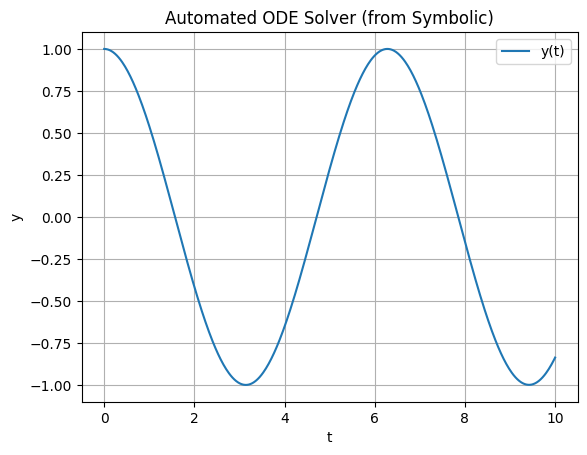

In [20]:
from sympy import symbols, Function, Eq, Derivative
from sympy.utilities.lambdify import lambdify
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# === 1. Define symbolic variables ===
t = symbols('t')
y = Function('y')(t)

# === 2. Define the equation ===
# Example: y'' + y = 0
ode = Eq(Derivative(y, t, t), -y)

# === 3. Extract RHS and lambdify it ===
rhs_expr = ode.rhs
rhs_func = lambdify((t, y, Derivative(y, t)), rhs_expr, 'numpy')

# === 4. Define the system for solve_ivp ===
def system(t, Y):
    y, dy = Y
    return [dy, rhs_func(t, y, dy)]

# === 5. Initial conditions and solve ===
y0 = [1.0, 0.0]  # y(0), y'(0)
t_span = (0, 10)
t_eval = np.linspace(*t_span, 500)

sol = solve_ivp(system, t_span, y0, t_eval=t_eval)
print(type(system))

# === 6. Plot ===
plt.plot(sol.t, sol.y[0], label='y(t)')
plt.grid()
plt.title("Automated ODE Solver (from Symbolic)")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()
